<a href="https://colab.research.google.com/github/mohamedalaouiysf/TimeSeries/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['figure.figsize'] = [15, 5]

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dpa.xlsx to dpa.xlsx


In [3]:
# Charger les données DPAE
df = pd.read_excel('dpa.xlsx')

In [26]:
df.head()

,Année,Trimestre,Durée de contrat,Nature de contrat,DPAE (brut),DPAE (cvs)
Dernier jour du mois,,,,,,
2000-02-29,2000,1,Contrat de plus d'un mois,CDD de plus d'un mois,222287,321417
2000-03-31,2000,1,Contrat de plus d'un mois,CDD de plus d'un mois,267406,324373
2000-04-30,2000,2,Contrat de plus d'un mois,CDI,274633,282960
2000-05-31,2000,2,Contrat de plus d'un mois,CDI,256064,283773
2000-06-30,2000,2,Contrat de plus d'un mois,CDI,248450,280461


In [5]:
print(df.dtypes)

Année                     int64
Trimestre                 int64
﻿Dernier jour du mois    object
Durée de contrat         object
Nature de contrat        object
DPAE (brut)               int64
DPAE (cvs)                int64
dtype: object


In [6]:
df = df.rename(columns={'﻿Dernier jour du mois': 'Dernier jour du mois'})

In [7]:
df['Dernier jour du mois'] = pd.to_datetime(df['Dernier jour du mois'])
df.dtypes

Année                            int64
Trimestre                        int64
Dernier jour du mois    datetime64[ns]
Durée de contrat                object
Nature de contrat               object
DPAE (brut)                      int64
DPAE (cvs)                       int64
dtype: object

In [8]:
df.set_index('Dernier jour du mois', inplace=True)

In [9]:
df_cdi = df[df['Nature de contrat']=='CDI']
df_cdd = df[df['Nature de contrat']!='CDI']

In [10]:
df_cdd

,Année,Trimestre,Durée de contrat,Nature de contrat,DPAE (brut),DPAE (cvs)
Dernier jour du mois,,,,,,
2000-02-29,2000,1,Contrat de plus d'un mois,CDD de plus d'un mois,222287,321417
2000-03-31,2000,1,Contrat de plus d'un mois,CDD de plus d'un mois,267406,324373
2000-12-31,2000,4,Contrat de plus d'un mois,CDD de plus d'un mois,203868,315242
2001-02-28,2001,1,Contrat de plus d'un mois,CDD de plus d'un mois,206800,318447
2001-03-31,2001,1,Contrat de plus d'un mois,CDD de plus d'un mois,247699,307696
...,...,...,...,...,...,...
2022-06-30,2022,2,Contrat de plus d'un mois,CDD de plus d'un mois,451693,401949
2022-08-31,2022,3,Contrat de plus d'un mois,CDD de plus d'un mois,335646,418876
2022-10-31,2022,4,Contrat de plus d'un mois,CDD de plus d'un mois,382254,392120


In [45]:
df_cdd.drop(['Durée de contrat','Nature de contrat'],axis=1,inplace=True)
df_cdi.drop(['Durée de contrat','Nature de contrat'],axis=1,inplace=True)

<ipython-input-45-1a75afe86029>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cdd.drop(['Durée de contrat','Nature de contrat'],axis=1,inplace=True)
<ipython-input-45-1a75afe86029>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cdi.drop(['Durée de contrat','Nature de contrat'],axis=1,inplace=True)


<Axes: xlabel='Dernier jour du mois'>

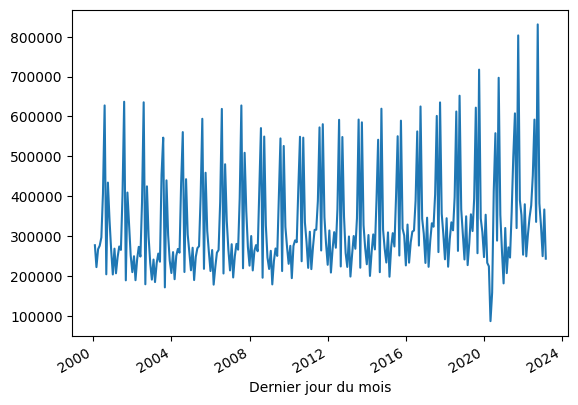

In [12]:
df_cdd['DPAE (brut)'].plot()

In [33]:
grouped = df_cdd.groupby('Année')
description = grouped[['DPAE (cvs)', 'DPAE (brut)']].describe()
print(description)

      DPAE (cvs)                                                              \
           count           mean           std       min        25%       50%   
Année                                                                          
2000        12.0  320575.333333   7639.958321  312072.0  314809.00  320214.5   
2001        12.0  307597.416667   6597.489474  292849.0  305212.50  308357.0   
2002        12.0  292842.000000   9586.804653  271794.0  289464.50  292837.5   
2003        12.0  290072.833333  17201.421452  273724.0  283634.25  285872.0   
2004        12.0  303580.416667   7161.889497  293803.0  299848.50  302794.5   
2005        12.0  310008.750000   6102.005350  301535.0  305424.25  309591.0   
2006        12.0  307097.583333  15245.078428  276469.0  299243.00  312510.5   
2007        12.0  322873.083333   7414.633620  308575.0  318005.25  322932.5   
2008        12.0  317049.833333  15549.298738  296353.0  301994.50  316731.0   
2009        12.0  307522.083333  12675.2

In [36]:
grouped2 = df_cdd.groupby('Trimestre')
description2 = grouped2[['DPAE (brut)']].describe()
print(description2)

          DPAE (brut)                                                    \
                count           mean            std       min       25%   
Trimestre                                                                 
1                71.0  257736.253521   48166.842433  178356.0  222847.0   
2                69.0  323629.449275   72333.072943   86869.0  269749.0   
3                69.0  464227.231884  178924.551679  171477.0  262936.0   
4                69.0  279865.318841   52810.320979  181481.0  232872.0   

                                         
                50%       75%       max  
Trimestre                                
1          253932.0  283647.0  379830.0  
2          312661.0  389042.0  498278.0  
3          546768.0  594082.0  830629.0  
4          271013.0  325989.0  390359.0  


<Axes: xlabel='Dernier jour du mois'>

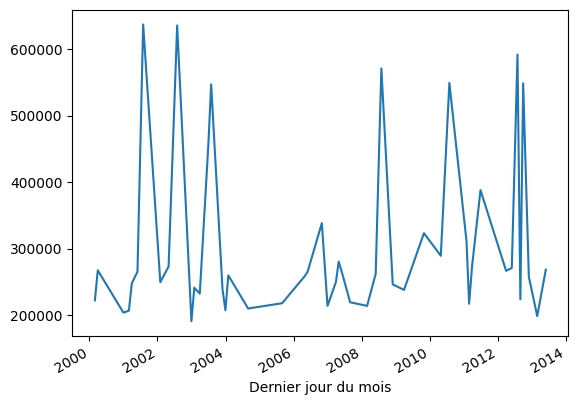

In [25]:
# Zoom on the first 50 months
df_cdd.iloc[0:49]['DPAE (brut)'].plot()
# -> A seasonality appears.

<Axes: xlabel='Dernier jour du mois'>

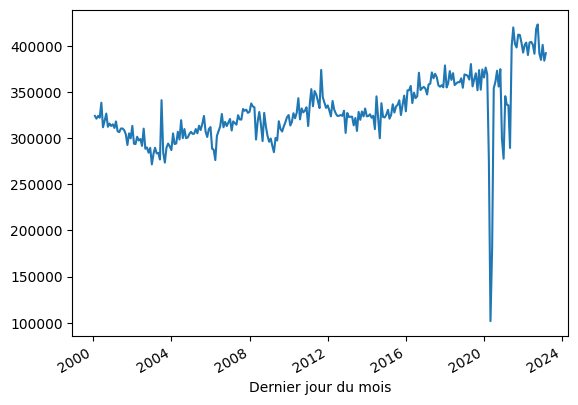

In [13]:
df_cdd['DPAE (cvs)'].plot()

<Axes: xlabel='Dernier jour du mois'>

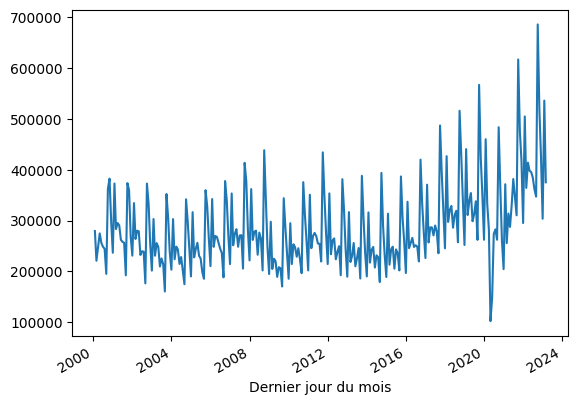

In [14]:
df_cdi['DPAE (brut)'].plot()

In [20]:
piv1 = pd.pivot_table(df_cdd, index=['Trimestre'],columns=['Année'])
piv1.head()

DPAE (brut)                                               \
Année               2000           2001           2002           2003   
Trimestre                                                               
1          255606.666667  241008.000000  227149.000000  219492.000000   
2          326543.666667  313430.333333  302266.666667  315354.666667   
3          421970.666667  411712.333333  413116.666667  385991.333333   
4          269307.333333  263995.000000  240825.666667  249649.333333   

                                                                       \
Année               2004           2005           2006           2007   
Trimestre                                                               
1          234104.333333  236216.333333  222042.000000  241897.666667   
2          319697.000000  314929.333333  303065.333333  314063.666667   
3          404465.000000  423614.333333  435066.333333  451880.000000   
4          259912.666667  262295.333333  272903.333333  287144.666667   

                                         ...     DPAE (cvs)                 \
Année               2008           2009  ...           2014           2015   
Trimestre                                ...                                 
1          259131.000000  226667.333333  ...  324328.333333  325998.333333   
2          318226.666667  304316.000000  ...  326754.333333  333218.333333   
3          438666.000000  427713.666667  ...  320152.666667  334373.000000   
4          263479.000000  275937.333333  ...  323904.666667  337491.333333   

                                                                       \
Année               2016           2017           2018           2019   
Trimestre                                                               
1          353761.000000  355221.000000  362653.333333  366884.666667   
2          343922.666667  369012.000000  364083.333333  367080.666667   
3          356531.000000  360012.000000  360582.333333  365706.000000   
4          354840.000000  364138.666667  363214.000000  364593.000000   

                                                                  
Année               2020           2021           2022      2023  
Trimestre                                                         
1          340649.666667  339458.333333  398736.666667  388421.5  
2          212397.333333  370018.333333  403612.000000       NaN  
3          363712.666667  404664.000000  411504.000000       NaN  
4          317572.333333  403123.000000  392971.333333       NaN  

[4 rows x 48 columns]

<Axes: xlabel='Trimestre'>

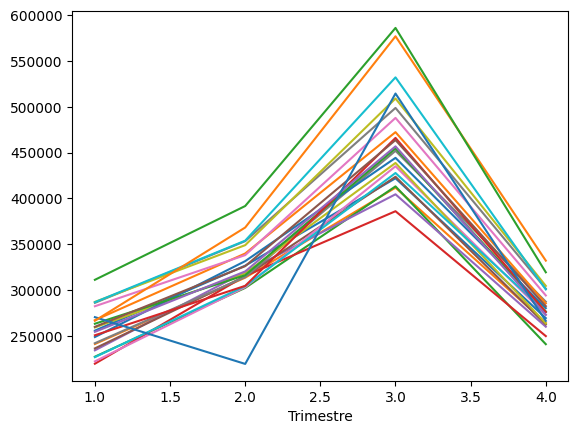

In [21]:
piv1['DPAE (brut)'].plot(legend = None)

<Axes: xlabel='Trimestre'>

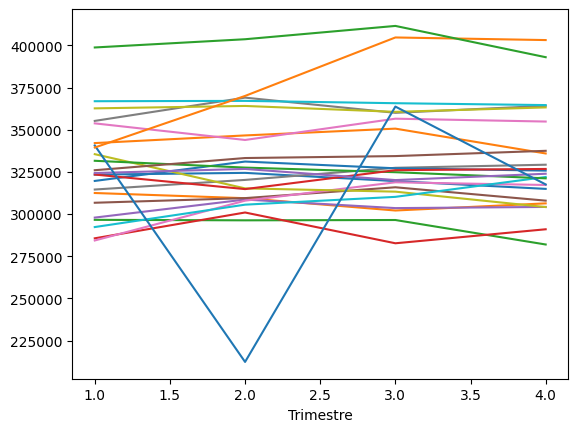

In [22]:
piv1['DPAE (cvs)'].plot(legend = None)

In [23]:
piv1.describe()

DPAE (brut)                                               \
Année           2000           2001           2002           2003   
count       4.000000       4.000000       4.000000       4.000000   
mean   318357.083333  307536.416667  295839.500000  292621.833333   
std     75600.457593   75739.124756   84735.173612   74002.823192   
min    255606.666667  241008.000000  227149.000000  219492.000000   
25%    265882.166667  258248.250000  237406.500000  242110.000000   
50%    297925.500000  288712.666667  271546.166667  282502.000000   
75%    350400.416667  338000.833333  329979.166667  333013.833333   
max    421970.666667  411712.333333  413116.666667  385991.333333   

                                                                   \
Année           2004           2005           2006           2007   
count       4.000000       4.000000       4.000000       4.000000   
mean   304544.750000  309263.833333  308269.250000  323746.500000   
std     75647.256401   82966.081401   90903.736254   90463.393711   
min    234104.333333  236216.333333  222042.000000  241897.666667   
25%    253460.583333  255775.583333  260188.000000  275832.916667   
50%    289804.833333  288612.333333  287984.333333  300604.166667   
75%    340889.000000  342100.583333  336065.583333  348517.750000   
max    404465.000000  423614.333333  435066.333333  451880.000000   

                                     ...     DPAE (cvs)                 \
Année           2008           2009  ...           2014           2015   
count       4.000000       4.000000  ...       4.000000       4.000000   
mean   319875.666667  308658.583333  ...  323785.000000  332770.250000   
std     83634.843285   85608.052923  ...    2727.655716    4861.997855   
min    259131.000000  226667.333333  ...  320152.666667  325998.333333   
25%    262392.000000  263619.833333  ...  322966.666667  331413.333333   
50%    290852.833333  290126.666667  ...  324116.500000  333795.666667   
75%    348336.500000  335165.416667  ...  324934.833333  335152.583333   
max    438666.000000  427713.666667  ...  326754.333333  337491.333333   

                                                                   \
Année           2016           2017           2018           2019   
count       4.000000       4.000000       4.000000       4.000000   
mean   352263.666667  362095.916667  362633.250000  366066.083333   
std      5676.322616    5876.853582    1488.475143    1154.569549   
min    343922.666667  355221.000000  360582.333333  364593.000000   
25%    351301.416667  358814.250000  362135.583333  365427.750000   
50%    354300.500000  362075.333333  362933.666667  366295.333333   
75%    355262.750000  365357.000000  363431.333333  366933.666667   
max    356531.000000  369012.000000  364083.333333  367080.666667   

                                                              
Année           2020           2021           2022      2023  
count       4.000000       4.000000       4.000000       1.0  
mean   308583.000000  379315.916667  401706.000000  388421.5  
std     66833.229868   31007.389176    7847.398342       NaN  
min    212397.333333  339458.333333  392971.333333  388421.5  
25%    291278.583333  362378.333333  397295.333333  388421.5  
50%    329111.000000  386570.666667  401174.333333  388421.5  
75%    346415.416667  403508.250000  405585.000000  388421.5  
max    363712.666667  404664.000000  411504.000000  388421.5  

[8 rows x 48 columns]

In [15]:
piv2 = pd.pivot_table(df_cdd, index=['Année'])
piv2.head()

,DPAE (brut),DPAE (cvs),Trimestre
Année,,,
2000,318357.083333,320575.333333,2.5
2001,307536.416667,307597.416667,2.5
2002,295839.500000,292842.000000,2.5
2003,292621.833333,290072.833333,2.5
2004,304544.750000,303580.416667,2.5


<Axes: xlabel='Année'>

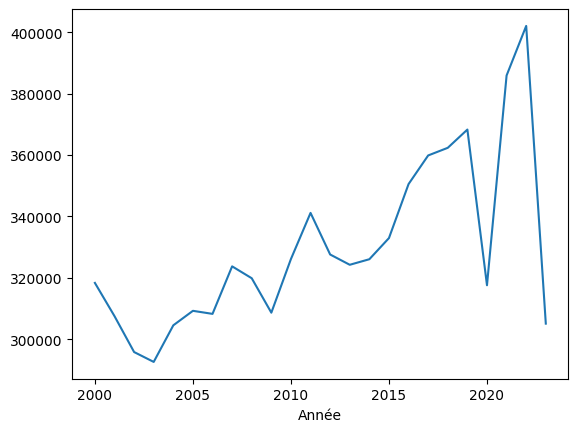

In [38]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
df_cdd.head()

,Année,Trimestre,DPAE (brut),DPAE (cvs)
Dernier jour du mois,,,,
2000-02-29,2000,1,222287,321417
2000-03-31,2000,1,267406,324373
2000-12-31,2000,4,203868,315242
2001-02-28,2001,1,206800,318447
2001-03-31,2001,1,247699,307696


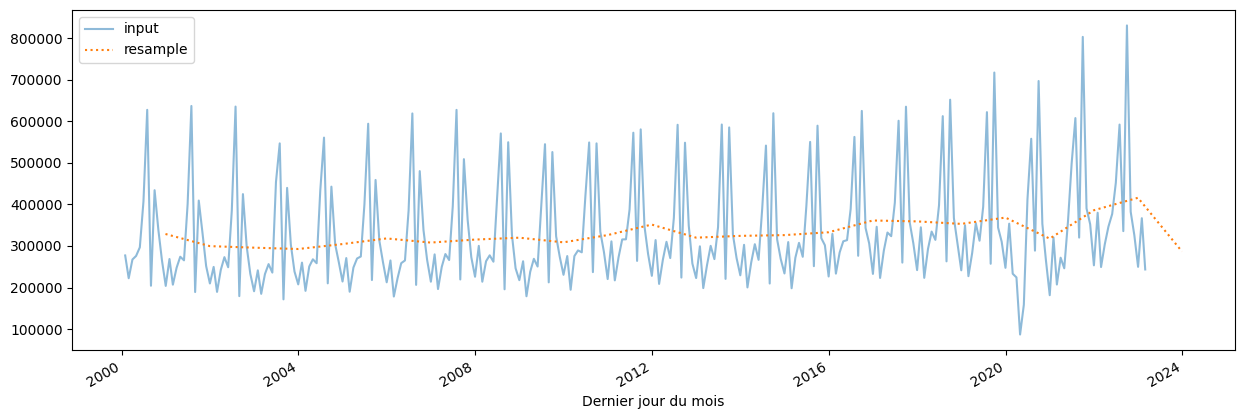

In [60]:
# Resample the data and plot on the same figure
ax = df_cdd['DPAE (brut)'].plot(alpha=0.5, style='-')
df_cdd['DPAE (brut)'].resample('BA').mean().plot(style=':', ax = ax)

plt.legend(['input', 'resample'], loc='upper left');



In [74]:
df_cdd_dpaebrut = df_cdd['DPAE (brut)']

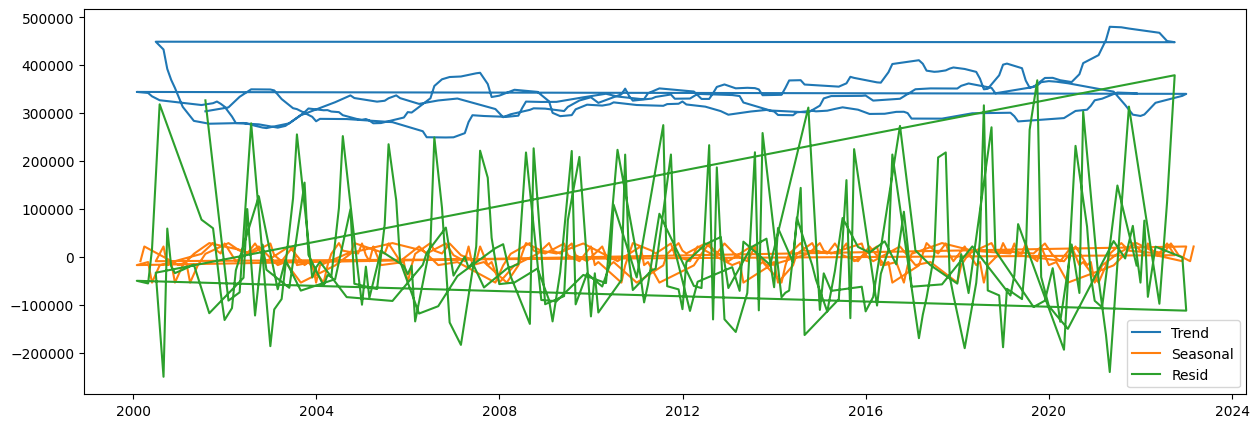

In [76]:

# Perform seasonal decomposition
result = seasonal_decompose(df_cdd_dpaebrut.values, model='additive', period=12)

# Access the decomposed components
trend = result.trend
seasonal = result.seasonal
residual = result.resid
plt.figure()
plt.plot(df_cdd_dpaebrut.index,trend)
plt.plot(df_cdd_dpaebrut.index,seasonal)
plt.plot(df_cdd_dpaebrut.index,residual)
plt.legend(['Trend', 'Seasonal', 'Resid'])

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_cdd., period=12) 
plt.figure()
plt.plot(df_cdd.index,decomposition.trend)
plt.plot(df_cdd.index,decomposition.seasonal)
plt.plot(df_cdd.index,decomposition.resid)
plt.legend(['Trend', 'Seasonal', 'Resid'])

TypeError: ignored

In [66]:
df_cdd['DPAE (brut)']

Dernier jour du mois
2000-02-29    222287
2000-03-31    267406
2000-12-31    203868
2001-02-28    206800
2001-03-31    247699
               ...  
2022-06-30    451693
2022-08-31    335646
2022-10-31    382254
2023-01-31    366756
2023-02-28    243429
Name: DPAE (brut), Length: 278, dtype: int64

In [79]:
df_cdd.sort_index().head(12)

,Année,Trimestre,DPAE (brut),DPAE (cvs)
Dernier jour du mois,,,,
2000-01-31,2000,1,277127,324376
2000-02-29,2000,1,222287,321417
2000-03-31,2000,1,267406,324373
2000-04-30,2000,2,275935,322446
2000-05-31,2000,2,296683,338773
2000-06-30,2000,2,407013,312072
2000-07-31,2000,3,627534,319012
2000-08-31,2000,3,204246,326991
2000-09-30,2000,3,434132,312622


df2


In [80]:
uploaded2 = files.upload()

Saving famille_EMPLOI.xlsx to famille_EMPLOI.xlsx


In [183]:
# Charger les données DPAE
df2 = pd.read_excel('famille_EMPLOI.xlsx')

/usr/local/lib/python3.9/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [184]:
df2.head()

,Libellé,idBank,Dernière mise à jour,Période,1970-T4,1971-T1,1971-T2,1971-T3,1971-T4,1972-T1,...,2020-T3,2020-T4,2021-T1,2021-T2,2021-T3,2021-T4,2022-T1,2022-T2,2022-T3,2022-T4
0,Emplois salariés trimestriels - Secteurs princ...,1577239,12/05/2017 00:00,NaN,12409.6,12418.8,12485.6,12576.1,12628.8,12689,...,(O),(O),(O),(O),(O),(O),(O),(O),(O),(O)
1,Emplois salariés trimestriels - Industrie - Se...,1577235,09/03/2023 07:30,NaN,5440.3,5459.1,5487.7,5522.1,5526.9,5536,...,3164.3,3156.8,3167.2,3175.2,3187.6,3198.2,3203.8,3214.1,3228.2,3235.8
2,Emplois salariés trimestriels - Construction -...,1577236,09/03/2023 07:30,NaN,1807.9,1807.2,1811.8,1815.7,1808.8,1804.8,...,1516.3,1530.4,1551.1,1560.5,1574.3,1581.4,1585.6,1587.9,1591.6,1592.4
3,Emplois salariés trimestriels - Tertiaire marc...,1577237,09/03/2023 07:30,NaN,5320,5312,5346.7,5399.6,5453.9,5509.1,...,12465.2,12386.5,12511.7,12771.4,12949.8,13113.7,13197.4,13280.2,13349.9,13375.9
4,Emplois salariés trimestriels - Industries ext...,1577241,09/03/2023 07:30,NaN,294.7,294.9,295.4,295.7,295.8,296.1,...,388.2,388.7,391.1,392.7,394.3,394.6,395.1,397,399.5,401.3


In [185]:

df2.drop(['idBank','Période','Dernière mise à jour'],axis=1,inplace=True)
df2.head()

,Libellé,1970-T4,1971-T1,1971-T2,1971-T3,1971-T4,1972-T1,1972-T2,1972-T3,1972-T4,...,2020-T3,2020-T4,2021-T1,2021-T2,2021-T3,2021-T4,2022-T1,2022-T2,2022-T3,2022-T4
0,Emplois salariés trimestriels - Secteurs princ...,12409.6,12418.8,12485.6,12576.1,12628.8,12689,12735.9,12815.4,12922.1,...,(O),(O),(O),(O),(O),(O),(O),(O),(O),(O)
1,Emplois salariés trimestriels - Industrie - Se...,5440.3,5459.1,5487.7,5522.1,5526.9,5536,5556.9,5583,5621.2,...,3164.3,3156.8,3167.2,3175.2,3187.6,3198.2,3203.8,3214.1,3228.2,3235.8
2,Emplois salariés trimestriels - Construction -...,1807.9,1807.2,1811.8,1815.7,1808.8,1804.8,1804.8,1805.7,1816.9,...,1516.3,1530.4,1551.1,1560.5,1574.3,1581.4,1585.6,1587.9,1591.6,1592.4
3,Emplois salariés trimestriels - Tertiaire marc...,5320,5312,5346.7,5399.6,5453.9,5509.1,5535.5,5589.3,5648.4,...,12465.2,12386.5,12511.7,12771.4,12949.8,13113.7,13197.4,13280.2,13349.9,13375.9
4,Emplois salariés trimestriels - Industries ext...,294.7,294.9,295.4,295.7,295.8,296.1,296,296.5,296.9,...,388.2,388.7,391.1,392.7,394.3,394.6,395.1,397,399.5,401.3


In [188]:
def sector(name):
  secteur = name.split("-")[1]
  return secteur.strip()

In [189]:
df2['Libellé'] = df2['Libellé'].apply(sector)

In [190]:
df2=df2.set_index('Libellé')


In [191]:
df2=df2.transpose()

In [192]:
date_range = pd.date_range(start='1970-10-01', end='2022-12-31', freq='Q')
date_range

DatetimeIndex(['1970-12-31', '1971-03-31', '1971-06-30', '1971-09-30',
               '1971-12-31', '1972-03-31', '1972-06-30', '1972-09-30',
               '1972-12-31', '1973-03-31',
               ...
               '2020-09-30', '2020-12-31', '2021-03-31', '2021-06-30',
               '2021-09-30', '2021-12-31', '2022-03-31', '2022-06-30',
               '2022-09-30', '2022-12-31'],
              dtype='datetime64[ns]', length=209, freq='Q-DEC')

In [193]:
df2['trimestre']=date_range

In [194]:
df2=df2.set_index('trimestre')

In [195]:
df2.replace("(O)", np.nan, inplace=True)
df2

Libellé,Secteurs principalement marchands,Industrie,Construction,Tertiaire marchand,"Industries extractives, énergie, eau, gestion des déchets et dépollution","Fabrication de denrées alimentaires, de boissons et de produits à base de tabac",Cokéfaction et raffinage,"Fabrication d'équipements électriques, électroniques, informatiques, fabrication de machines",Fabrication de matériels de transport,Fabrication d'autres produits industriels,...,Industrie manufacturière,Industrie,Construction,Tertiaire marchand hors intérim,Tertiaire marchand,Tertiaire non marchand,Ensemble des salariés,"Ensemble des salariés, public","Ensemble des salariés, privé",Tertiaire non marchand
trimestre,,,,,,,,,,,,,,,,,,,,,
1970-12-31,12409.6,5440.3,1807.9,5320.0,294.7,514.1,36.3,758.3,599.7,3237.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-03-31,12418.8,5459.1,1807.2,5312.0,294.9,515.1,35.8,760.3,607.8,3245.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-06-30,12485.6,5487.7,1811.8,5346.7,295.4,521.3,35.5,764.6,612.6,3258.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-09-30,12576.1,5522.1,1815.7,5399.6,295.7,530.1,35.1,770.7,616.6,3274.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-12-31,12628.8,5526.9,1808.8,5453.9,295.8,521.6,34.6,774.6,617.8,3282.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,NaN,3198.2,1581.4,13113.7,394.6,634.9,8.7,403.9,354.8,1401.3,...,2803.6,3139.2,1579.8,12286.4,12954.2,2713.6,26614.9,5915.7,20699.2,8408.4
2022-03-31,NaN,3203.8,1585.6,13197.4,395.1,636.1,8.7,404.8,353.2,1405.9,...,2808.7,3145.2,1584.1,12382.4,13036.6,2720.9,26724.2,5919.2,20805.0,8418.4
2022-06-30,NaN,3214.1,1587.9,13280.2,397.0,636.6,8.6,406.5,353.6,1411.9,...,2817.2,3155.4,1586.3,12483.3,13118.6,2733.9,26823.9,5921.7,20902.2,8432.9


In [196]:
df2['Total'] = df2.sum(axis=1)

In [197]:
df2.head()

Libellé,Secteurs principalement marchands,Industrie,Construction,Tertiaire marchand,"Industries extractives, énergie, eau, gestion des déchets et dépollution","Fabrication de denrées alimentaires, de boissons et de produits à base de tabac",Cokéfaction et raffinage,"Fabrication d'équipements électriques, électroniques, informatiques, fabrication de machines",Fabrication de matériels de transport,Fabrication d'autres produits industriels,...,Industrie,Construction,Tertiaire marchand hors intérim,Tertiaire marchand,Tertiaire non marchand,Ensemble des salariés,"Ensemble des salariés, public","Ensemble des salariés, privé",Tertiaire non marchand,Total
trimestre,,,,,,,,,,,,,,,,,,,,,
1970-12-31,12409.6,5440.3,1807.9,5320.0,294.7,514.1,36.3,758.3,599.7,3237.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44241.5
1971-03-31,12418.8,5459.1,1807.2,5312.0,294.9,515.1,35.8,760.3,607.8,3245.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44276.6
1971-06-30,12485.6,5487.7,1811.8,5346.7,295.4,521.3,35.5,764.6,612.6,3258.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44521.4
1971-09-30,12576.1,5522.1,1815.7,5399.6,295.7,530.1,35.1,770.7,616.6,3274.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44845.0
1971-12-31,12628.8,5526.9,1808.8,5453.9,295.8,521.6,34.6,774.6,617.8,3282.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45023.7


<Axes: xlabel='trimestre'>

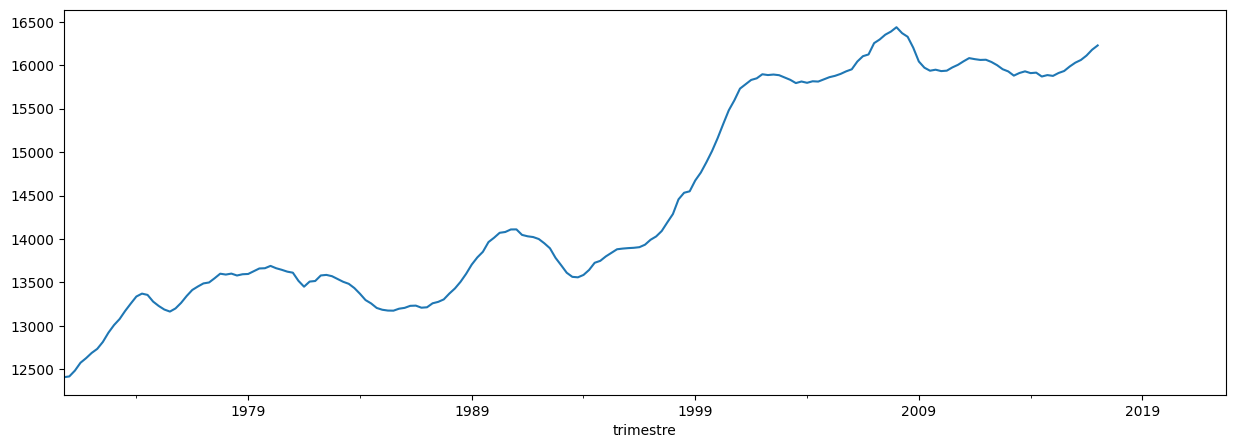

In [198]:
df2['Secteurs principalement marchands'].plot()